In [1]:
# Sbi
import sbi
from sbi.utils.get_nn_models import likelihood_nn
from sbi.analysis import pairplot
from sbi import inference
from sbi.vi.divergence_optimizers import ElboOptimizer
from sbi.vi.mixture_of_flows import MixtureFullGaussians, Mixture

# Sbi benchmark
import sbibm
from sbibm.metrics import c2st

# torch and so
import torch
from torch.distributions import Categorical
from torch.distributions.transforms import ComposeTransform
from torch import nn
import numpy as np

import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Loads a model...
def get_model(task_name):
    task = sbibm.get_task(task_name) 
    prior = task.prior_dist
    simulator = task.get_simulator()
    observation = task.get_observation(num_observation=1) 

    thetas = prior.sample((10000,))
    xs = simulator(thetas)


    inf = inference.SNLVI(prior)
    density_estimator = inf.append_simulations(thetas, xs).train(max_num_epochs=0)
    state_dict = torch.load(f"scripts/likelihood_models/{task_name}.net")
    density_estimator = inf._neural_net
    density_estimator.load_state_dict(state_dict())
    return inf, task

In [3]:
inf, task = get_model("two_moons")

In [27]:
posterior = inf.build_posterior(flow="affine_tril",num_components=10, rsample=True)
posterior.set_default_x(task.get_observation(1))
x_obs = task.get_observation(1)

In [ ]:
posterior.train(loss="renjey_divergence",n_particles=2048, learning_rate=1e-2)

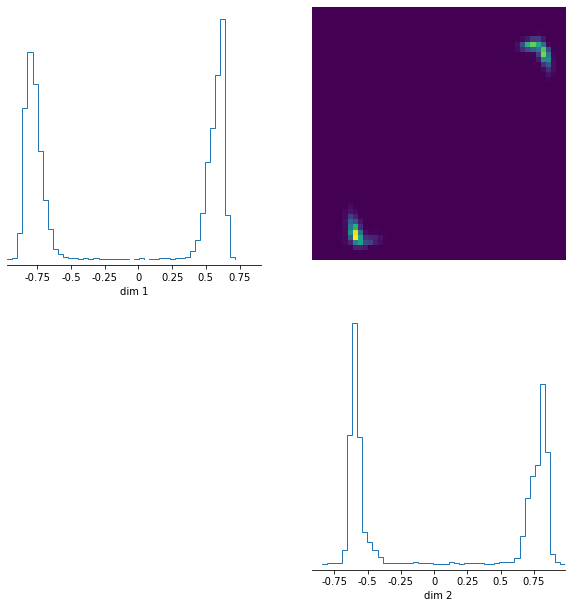

In [29]:
samples = posterior.sample((10000,))
_ = pairplot(samples)

In [54]:
posterior = inf.build_posterior(flow="affine_autoregressive",num_components=4, num_flows=2, rsample=True)
posterior.set_default_x(task.get_observation(1))
x_obs = task.get_observation(1)

In [56]:
posterior.train(loss="renjey_divergence",n_particles=2048, learning_rate=1e-2)

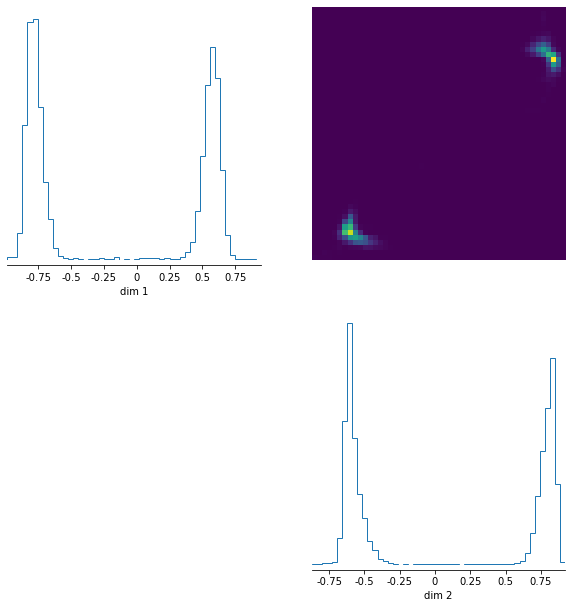

In [57]:
samples = posterior.sample((10000,))
_ = pairplot(samples)

In [61]:
posterior = inf.build_posterior(flow="spline_autoregressive",num_components=4, num_flows=2, rsample=True)
posterior.set_default_x(task.get_observation(1))
x_obs = task.get_observation(1)

In [72]:
posterior.train(loss="renjey_divergence",n_particles=2048, learning_rate=1e-2)

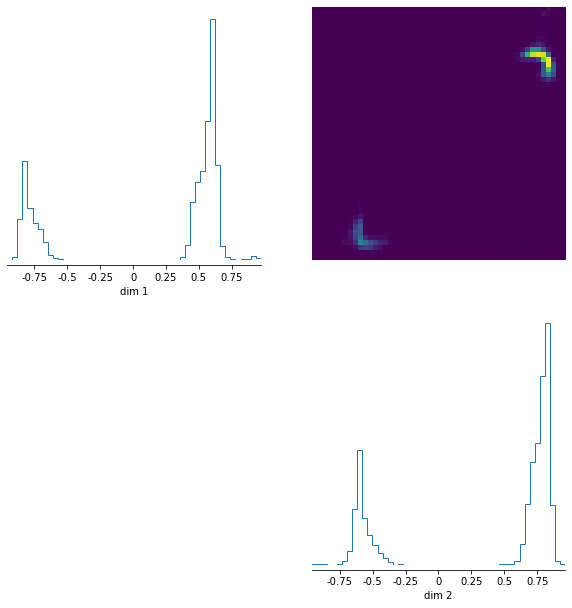

In [73]:
samples = posterior.sample((10000,))
_ = pairplot(samples)

In [3]:
inf, task = get_model("slcp")

In [87]:
posterior = inf.build_posterior(flow="affine_tril",num_components=10, rsample=True)
posterior.set_default_x(task.get_observation(1))
x_obs = task.get_observation(1)

In [110]:
posterior.train(loss="renjey_divergence",n_particles=2048, learning_rate=1e-2, gamma=0.995)

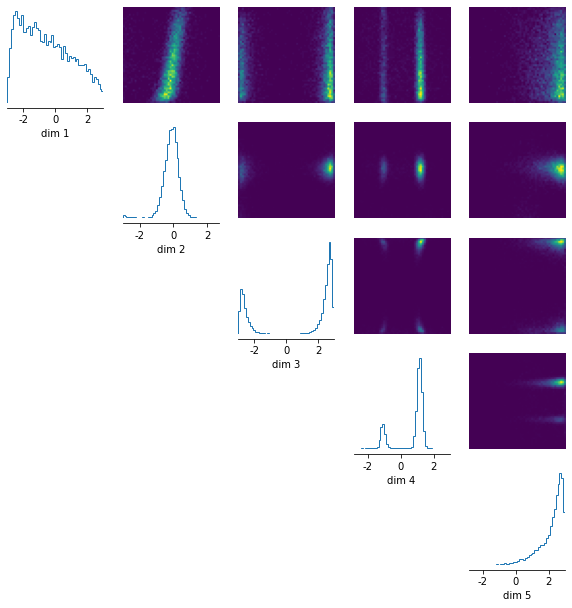

In [111]:
samples = posterior.sample((10000,))
_ = pairplot(samples)

In [41]:
posterior = inf.build_posterior(flow="spline_autoregressive",num_components=5, num_flows=1,rsample=True)
posterior.set_default_x(task.get_observation(1))
x_obs = task.get_observation(1)

In [47]:
posterior.train(loss="renjey_divergence",n_particles=512, learning_rate=1e-2, gamma=0.995)

Loss: 22.62:  55%|█████▍    | 1099/2000 [26:26<21:40,  1.44s/it]Converged with loss: 22.799999237060547

Quality Score: 0.512 (smaller values are good, should be below 0.7, mode collapse may still occured.)


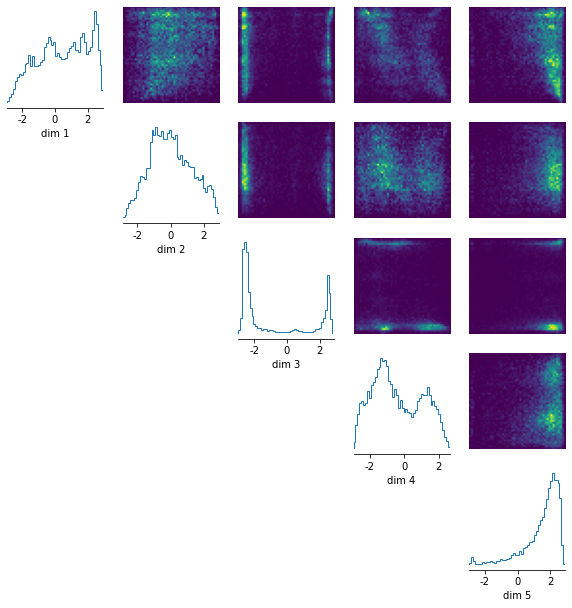

In [46]:
samples = posterior.sample((10000,))
_ = pairplot(samples)